### Few of the feature selection techniques are Univariate selection(SelectKBest), Feature Importance, correlation of features

In [65]:
import numpy as np
import pandas as pd

In [66]:
df = pd.read_csv('../input/mobile-price-classification/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [67]:
df.shape

(2000, 21)

## 1. using SelectKBest

In [82]:
#splitting the df to X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [83]:
from sklearn.feature_selection import SelectKBest, chi2
df_top_features = SelectKBest(score_func=chi2,k=10)
df_top_features.fit(X,y)
score_df = pd.DataFrame(df_top_features.scores_,columns=['Score'])
score_df['Feature'] = X.columns
score_df

,Score,Feature
0,14129.866576,battery_power
1,0.723232,blue
2,0.648366,clock_speed
3,0.631011,dual_sim
4,10.135166,fc
5,1.521572,four_g
6,89.839124,int_memory
7,0.745820,m_dep
8,95.972863,mobile_wt
9,9.097556,n_cores


In [70]:
top_df = score_df.nlargest(10,'Score')
top_df

,Score,Feature
13,931267.519053,ram
11,17363.569536,px_height
0,14129.866576,battery_power
12,9810.586750,px_width
8,95.972863,mobile_wt
6,89.839124,int_memory
15,16.480319,sc_w
16,13.236400,talk_time
4,10.135166,fc
14,9.614878,sc_h


## 2. Feature Importance
### using ExtraTreesClassifier

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

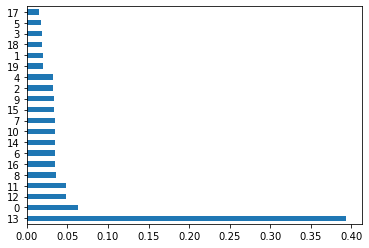

In [72]:
feat_imp = pd.Series(model.feature_importances_)
feat_imp.sort_values(ascending=False).plot(kind='barh')

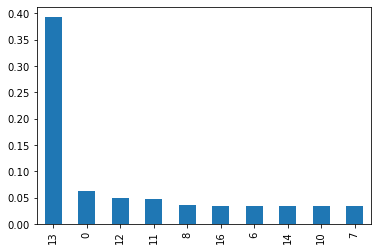

In [73]:
#for the top 10 features
feat_imp.nlargest(10).plot(kind='bar')

### actually, we can compare all the types of feature selection and check the top 10 features are same..

## 3. Correlation

In [74]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


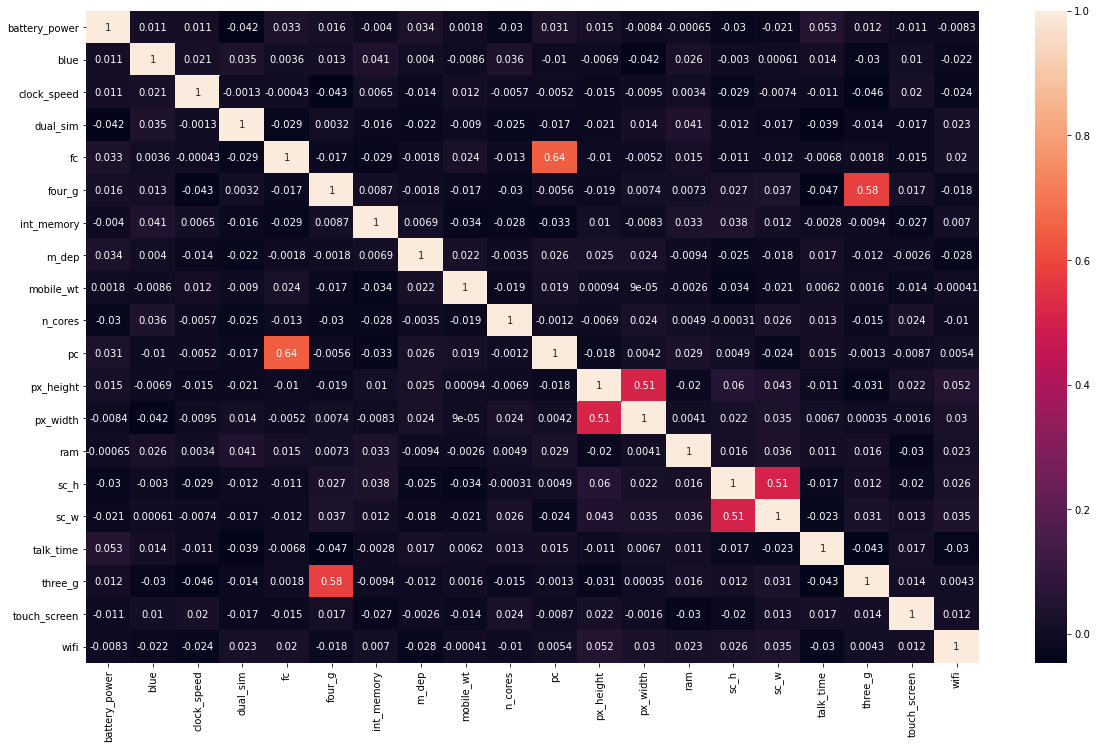

In [75]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(df.iloc[:,:-1].corr(),annot=True)   #remove target as it does not involve in finding correlation

In [76]:
#now we can set a threshold value to remove the features above that which are really correlated.
def correlation(df,threshold):
    col_set = set()
    corr_mat = df.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j]) > threshold:
                col_name = corr_mat.columns[i]
                col_set.add(col_name)     #add is used for set operations
            else:
                pass
    return col_set

In [77]:
correlation(df.iloc[:,:-1],0.5)

{'pc', 'px_width', 'sc_w', 'three_g'}

## 4. Information Gain
### if the scores are '0', then the features are completely independent

In [78]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)

In [79]:
gain_series = pd.Series(mutual_info,index=X.columns)
gain_series

battery_power    0.027880
blue             0.000000
clock_speed      0.000000
dual_sim         0.001200
fc               0.012706
four_g           0.000000
int_memory       0.016751
m_dep            0.000000
mobile_wt        0.000423
n_cores          0.000000
pc               0.000000
px_height        0.027598
px_width         0.029363
ram              0.848615
sc_h             0.000000
sc_w             0.000000
talk_time        0.000000
three_g          0.000000
touch_screen     0.008725
wifi             0.000000
dtype: float64

In [80]:
gain_series.sort_values(ascending=False)
#the values that are zero - completely independent.

ram              0.848615
px_width         0.029363
battery_power    0.027880
px_height        0.027598
int_memory       0.016751
fc               0.012706
touch_screen     0.008725
dual_sim         0.001200
mobile_wt        0.000423
blue             0.000000
clock_speed      0.000000
four_g           0.000000
wifi             0.000000
m_dep            0.000000
pc               0.000000
sc_h             0.000000
sc_w             0.000000
talk_time        0.000000
three_g          0.000000
n_cores          0.000000
dtype: float64

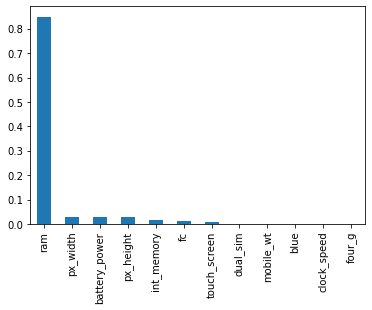

In [81]:
gain_series.sort_values(ascending=False)[:12].plot(kind='bar')

## Explore more feature selection techniques in future